In [1]:
tensor_path = "/home/abujalancegome/deep_risk/data/ECG_leads_full_pretraining_w_IDs_50.pth" # for testing ECG pre-processed
import torch

print(torch.load(tensor_path).keys())

ecg_signal = torch.load(tensor_path)["ECG_originals"].to(dtype=torch.float32).numpy()[5][5]
ecg_signal.shape

dict_keys(['ECG_tensors', 'ECG_originals', 'IDs'])


(5000,)

In [5]:
tensor = torch.load(tensor_path)['ECG_tensors'][:50, :, :]
tensor.shape

torch.Size([50, 12, 5000])

In [6]:
torch.save(tensor, "tensor_toy.pt")

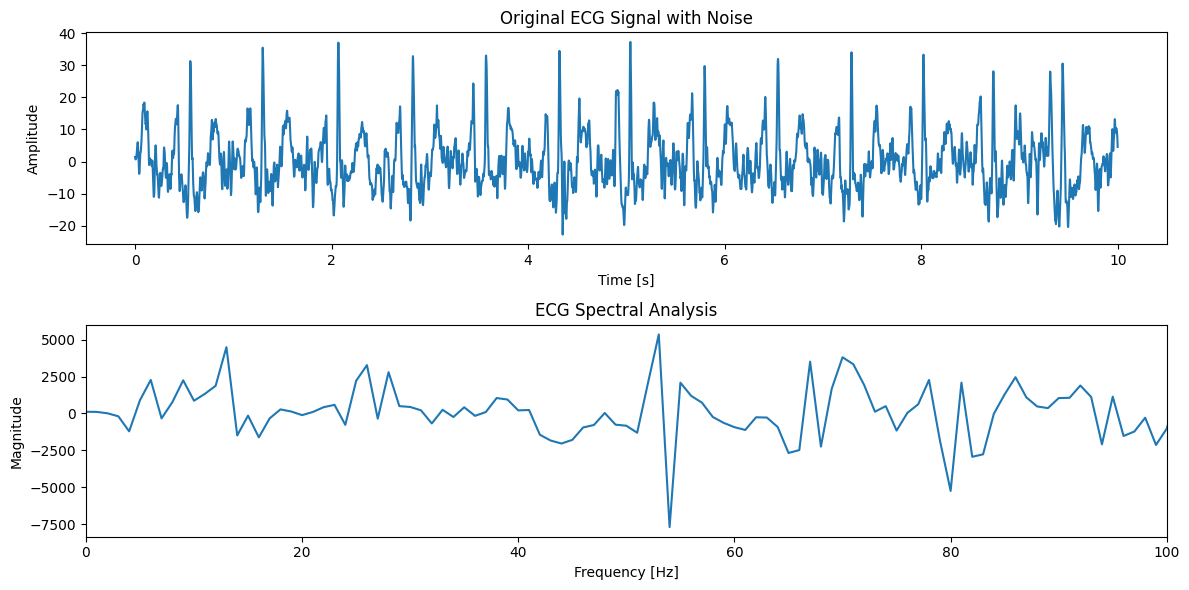

In [17]:
from scipy.fft import fftshift

import numpy as np
import matplotlib.pyplot as plt

# Generate a sample signal (e.g., a sine wave with some noise)
sampling_rate = 5000  # Sampling rate in Hz
t = np.linspace(0, 10, sampling_rate, endpoint=False)  # Time vector

# Perform the FFT
fft_result = np.fft.fft(ecg_signal)
frequencies = np.fft.fftfreq(len(ecg_signal), 1 / sampling_rate)

# Plot the original signal and its FFT
plt.figure(figsize=(12, 6))

# Plot the original signal
plt.subplot(2, 1, 1)
plt.plot(t, ecg_signal)
plt.title('Original ECG Signal with Noise')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the FFT result
plt.subplot(2, 1, 2)
plt.plot(fft_result)
plt.title('ECG Spectral Analysis')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim([0, 100])  # Focus on relevant frequencies

plt.tight_layout()
plt.show()


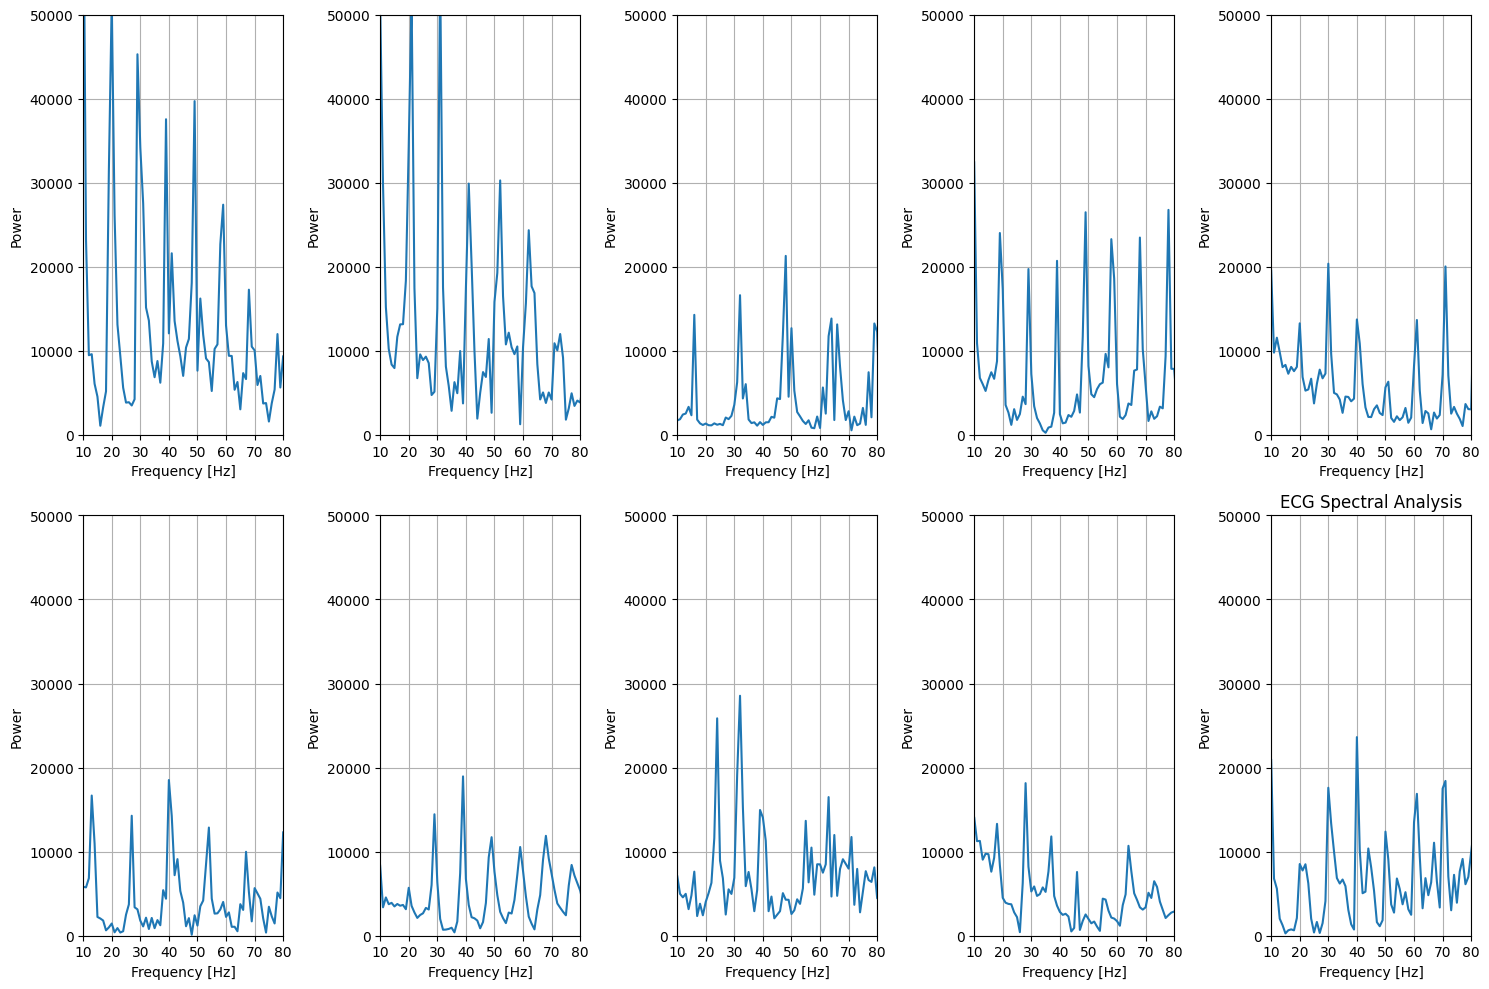

In [5]:
from scipy.fft import fftshift

import numpy as np
import matplotlib.pyplot as plt

# Generate a sample signal (e.g., a sine wave with some noise)
sampling_rate = 500  # Sampling rate in Hz
t = np.linspace(0, 10, sampling_rate, endpoint=False)  # Time vector

# Perform the FFT


fig, axes = plt.subplots(2, 5, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    ecg_signal = torch.load(tensor_path)["ECG_originals"].numpy()[i][0] # i particiapnt, lead 'I'
    # Plot the FFT result
    fft_result = np.abs(np.fft.fft(ecg_signal))
    frequencies = np.fft.fftfreq(len(ecg_signal), 1 / sampling_rate)

    ax.plot(fft_result)
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Power')
    ax.set_xlim([10, 80])
    ax.set_ylim([0, 50000])
    ax.set_xticks(ticks=range(10, 81, 10))
    ax.grid()

plt.title('ECG Spectral Analysis')
plt.tight_layout()
plt.show()